# What to Input
 
Graph: Your implementation can expect your graph to be submitted in adjacency matrix format, through a text file (call it graph.txt). Here is an example text filePreview the document to show you can provide adjacency matrix as input. This document will contain graph structure in matrix format, with three columns (I,j,k). Each row will denote information for a cell. e.g. a row of the form "i j k" denotes that the matrix contains a value k at the row i column j.  The value k=1 denotes that there is a link from document (node) i to document (node) j, else the value of k =0.    

Parameters: In your implementations use beta=0.85 as the dampening factor. 
 
 
# What to output:
 
 Your code should give out the Rank Vector (after convergence), 
    and number of iterations it took to converge.
    The rank scores should be rounded to 4 decimal places. 

Populating the interactive namespace from numpy and matplotlib


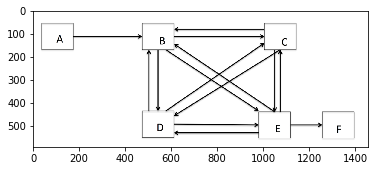

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('graph.png')
imgplot = plt.imshow(img)
plt.show()

In [12]:
# import library
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Read graph text file form disk
graph = open('./graph.txt', 'r')
data = graph.read() # process graph.txt
graph.close()# closing file
data = data.replace('\n', ' ').replace('\r', ' ').replace('\t', ' ').split() # split data and put in one row
# data

In [14]:
def split(theList):
    for i in range(0, len(theList), 3):
        yield theList[i:i+3]
data = split(data)
data = list(data)
data


[['A', 'A', '0'],
 ['A', 'B', '1'],
 ['A', 'C', '0'],
 ['A', 'D', '0'],
 ['A', 'E', '0'],
 ['A', 'F', '0'],
 ['B', 'A', '0'],
 ['B', 'B', '0'],
 ['B', 'C', '1'],
 ['B', 'D', '1'],
 ['B', 'E', '1'],
 ['B', 'F', '0'],
 ['C', 'A', '0'],
 ['C', 'B', '1'],
 ['C', 'C', '0'],
 ['C', 'D', '1'],
 ['C', 'E', '1'],
 ['C', 'F', '0'],
 ['D', 'A', '0'],
 ['D', 'B', '1'],
 ['D', 'C', '1'],
 ['D', 'D', '0'],
 ['D', 'E', '1'],
 ['D', 'F', '0'],
 ['E', 'A', '0'],
 ['E', 'B', '1'],
 ['E', 'C', '1'],
 ['E', 'D', '1'],
 ['E', 'E', '0'],
 ['E', 'F', '1'],
 ['F', 'A', '0'],
 ['F', 'B', '0'],
 ['F', 'C', '0'],
 ['F', 'D', '0'],
 ['F', 'E', '0'],
 ['F', 'F', '0']]

In [15]:
dic = {} #a dictionary object
dicdup = {} #duplicates
for i in data:
    node = i[0]
    if node not in dic:
        dic[node] = 0
    if i[1] not in dic: # for the graph.txt files where only 1 is shown
        dic[i[1]] = 0
    if i[2] == "1": #is there an dic edge?

        if node + "---->" + i[1] not in dicdup: #k=1 dictionary
            dic[node] += 1
            dicdup[node+"---->"+i[1]] = 1
dicdup

{'A---->B': 1,
 'B---->C': 1,
 'B---->D': 1,
 'B---->E': 1,
 'C---->B': 1,
 'C---->D': 1,
 'C---->E': 1,
 'D---->B': 1,
 'D---->C': 1,
 'D---->E': 1,
 'E---->B': 1,
 'E---->C': 1,
 'E---->D': 1,
 'E---->F': 1}

# Matrix M

In [16]:
m_matrix = pd.DataFrame(columns=dic.keys(), index=dic.keys(), dtype="double").fillna(0)
for i in data:
    if i[2] == "1":
        m_matrix.at[i[1],i[0]] = 1 / dic[i[0]]
print("What is the output for Matrix M? Give (print) the matrix:","\n\n", m_matrix,"\n")
m_matrix = m_matrix.as_matrix() #create a numpy matrix


What is the output for Matrix M? Give (print) the matrix: 

      A         B         C         D     E    F
A  0.0  0.000000  0.000000  0.000000  0.00  0.0
B  1.0  0.000000  0.333333  0.333333  0.25  0.0
C  0.0  0.333333  0.000000  0.333333  0.25  0.0
D  0.0  0.333333  0.333333  0.000000  0.25  0.0
E  0.0  0.333333  0.333333  0.333333  0.00  0.0
F  0.0  0.000000  0.000000  0.000000  0.25  0.0 



# Matrix A

In [17]:
# A = beta * M + (1-beta)*T
beta = 0.85 #BETA

T = np.matrix([[1/6,1/6,1/6,1/6,1/6,1/6],
               [1/6,1/6,1/6,1/6,1/6,1/6],
               [1/6,1/6,1/6,1/6,1/6,1/6],
               [1/6,1/6,1/6,1/6,1/6,1/6],
               [1/6,1/6,1/6,1/6,1/6,1/6],
               [1/6,1/6,1/6,1/6,1/6,1/6]])
reuslt1= beta * m_matrix
reuslt2=(1-beta)*T
print("What is the output of Matrix A? After applying teleportation. Give (print) the matrix.")
# Matrix_A= reuslt1+reuslt2
Matrix_A=np.add(reuslt1,reuslt2)
print(Matrix_A)

What is the output of Matrix A? After applying teleportation. Give (print) the matrix.
[[0.025      0.025      0.025      0.025      0.025      0.025     ]
 [0.875      0.025      0.30833333 0.30833333 0.2375     0.025     ]
 [0.025      0.30833333 0.025      0.30833333 0.2375     0.025     ]
 [0.025      0.30833333 0.30833333 0.025      0.2375     0.025     ]
 [0.025      0.30833333 0.30833333 0.30833333 0.025      0.025     ]
 [0.025      0.025      0.025      0.025      0.2375     0.025     ]]


# Original Rank Vector R

In [18]:
rj = []
for i in range(0, len(dic)):
    rj.append(1 / len(dic))
original_rank_vector_R = np.matrix(rj).T
print("What is the original rank vector (R)?:","\n\n", original_rank_vector_R, "\n")

What is the original rank vector (R)?: 

 [[0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]] 



# Converged Rank Vector R

In [19]:
iterations = 0; #iterations
lastrvec = original_rank_vector_R
currentrvec = np.empty(shape=(len(dic),1))  #(n,1) format for r vectors: n rows, one col
currentrvec.fill(-1) #start while loop with currentrvec values of -1
while(np.allclose(lastrvec, currentrvec, rtol=1e-06, atol=1e-06) == 0): 
    lastrvec = original_rank_vector_R
    iterations += 1
#     print(iterations)
    currentrvec =  m_matrix * original_rank_vector_R  # Formula for M :         rank_vector_t_plus_1 = m_matrix * rank_vector_t
    original_rank_vector_R = currentrvec
print(" When you use Matrix M")
print(currentrvec)
print("\n iterations is", iterations)



 When you use Matrix M
[[0.00000000e+00]
 [1.25876784e-05]
 [1.25876784e-05]
 [1.25876784e-05]
 [1.34734421e-05]
 [3.60538370e-06]]

 iterations is 143


In [20]:
iterations = 0; #exponent for iterations
lastrvec = original_rank_vector_R
currentrvec = np.empty(shape=(len(dic),1))  
currentrvec.fill(-1) 
# teleport_factor= round(teleport_factor)
# print("teleport_factor:" ,teleport_factor)
# Formula for A:  rank_vector_t_plus_1 = damp_factor * m_matrix * rank_vector_t + teleport_factor
while(np.allclose(lastrvec, currentrvec, rtol=1e-06, atol=1e-06) == 0): 
#     to 6 decimal places
    lastrvec = original_rank_vector_R
    iterations += 1
#     print(iterations , "\t", lastrvec)
    currentrvec =  (0.85 * m_matrix * original_rank_vector_R )+  (1- beta) / len(dic)
    original_rank_vector_R = currentrvec
print(" When you use Matrix A")
print(currentrvec ) 
print("\n iterations is", iterations)


 When you use Matrix A
[[0.025     ]
 [0.15901537]
 [0.14245693]
 [0.14245693]
 [0.15077911]
 [0.05704034]]

 iterations is 46
